In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.3MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=a3ed2e0dd63f2dffd86af04fa441bf2b54454b36ee06ce981d6dcea812c9afdd
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fzz
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# range input
x_dosen = np.arange(0,75,1)
x_nilai = np.arange(0,100,1)

# range output
x_tingkat = np.arange(0,100,1)

In [ ]:
# Fungsi mambership
dosen_buruk = fzz.trapmf(x_dosen,[0,0,20,40])
dosen_cukup = fzz.trimf(x_dosen,[20,40,60])
dosen_baik = fzz.trapmf(x_dosen,[40,60,75,75])

nilai_buruk = fzz.trapmf(x_nilai,[0,0,50,60])
nilai_cukup = fzz.trimf(x_nilai,[50,60,70])
nilai_baik = fzz.trapmf(x_nilai,[60,70,100,100])

tingkat_buruk = fzz.trapmf(x_tingkat,[0,0,50,60])
tingkat_cukup = fzz.trimf(x_tingkat,[50,60,70])
tingkat_baik = fzz.trapmf(x_tingkat,[60,70,100,100])


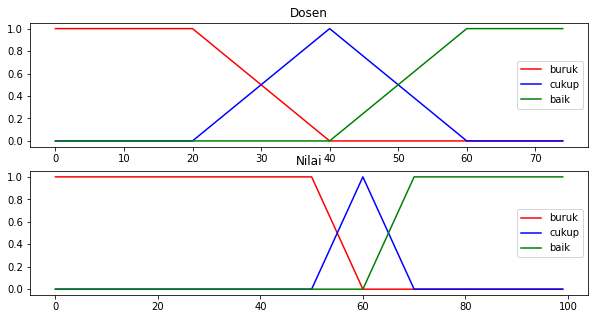

In [ ]:
# visualisasi
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10,5))

ax0.plot(x_dosen, dosen_buruk, 'r', linewidth=1.5, label = 'buruk')
ax0.plot(x_dosen, dosen_cukup, 'b', linewidth=1.5, label = 'cukup')
ax0.plot(x_dosen, dosen_baik, 'g', linewidth=1.5, label = 'baik')
ax0.set_title('Dosen')
ax0.legend()

ax1.plot(x_nilai, nilai_buruk, 'r', linewidth=1.5, label = 'buruk')
ax1.plot(x_nilai, nilai_cukup, 'b', linewidth=1.5, label = 'cukup')
ax1.plot(x_nilai, nilai_baik, 'g', linewidth=1.5, label = 'baik')
ax1.set_title('Nilai')
ax1.legend()

In [ ]:
# fuzifikasi
dosen = 55
nilai = 70

input_dosen = []
input_dosen.append(fzz.interp_membership(x_dosen,dosen_buruk,dosen))
input_dosen.append(fzz.interp_membership(x_dosen,dosen_cukup,dosen))
input_dosen.append(fzz.interp_membership(x_dosen,dosen_baik,dosen))

input_nilai = []
input_nilai.append(fzz.interp_membership(x_nilai,nilai_buruk,nilai))
input_nilai.append(fzz.interp_membership(x_nilai,nilai_cukup,nilai))
input_nilai.append(fzz.interp_membership(x_nilai,nilai_baik,nilai))

In [ ]:
# [R1] IF Dosen BURUK And Nilai BURUK
# THEN Tingkat RENDAH
R1 = np.fmin(input_dosen[0],input_nilai[0])

# [R2] IF Dosen BURUK And Nilai CUKUP
# THEN Tingkat SEDANG
R2 = np.fmin(input_dosen[0],input_nilai[1])

# [R3] IF Dosen BURUK And Nilai BAIK
# THEN Tingkat TINGGI
R3 = np.fmin(input_dosen[0],input_nilai[2])

# [R4] IF Dosen CUKUP And Nilai BURUK
# THEN Tingkat RENDAH
R4 = np.fmin(input_dosen[1],input_nilai[0])

# [R5] IF Dosen CUKUP And Nilai CUKUP
# THEN Tingkat SEDANG
R5 = np.fmin(input_dosen[1],input_nilai[1])

# [R6] IF Dosen CUKUP And Nilai BAIK
# THEN Tingkat TINGGI
R6 = np.fmin(input_dosen[1],input_nilai[2])

# [R7] IF Dosen BAIK And Nilai BURUK
# THEN Tingkat RENDAH
R7 = np.fmin(input_dosen[2],input_nilai[0])

# [R8] IF Dosen BAIK And Nilai CUKUP
# THEN Tingkat SEDANG
R8 = np.fmin(input_dosen[2],input_nilai[1])

# [R9] IF Dosen BAIK And Nilai BAIK
# THEN Tingkat TINGGI
R9 = np.fmin(input_dosen[2],input_nilai[2])

In [ ]:
# defuzifikasi
activation_R1 = np.fmin(R1,tingkat_buruk)
activation_R2 = np.fmin(R2,tingkat_cukup)
activation_R3 = np.fmin(R3,tingkat_baik)
activation_R4 = np.fmin(R4,tingkat_buruk)
activation_R5 = np.fmin(R5,tingkat_cukup)
activation_R6 = np.fmin(R6,tingkat_baik)
activation_R7 = np.fmin(R7,tingkat_buruk)
activation_R8 = np.fmin(R8,tingkat_cukup)
activation_R9 = np.fmin(R9,tingkat_baik)
tingkat0 = np.zeros_like(x_tingkat)

aggregated = np.fmax(
    activation_R1,np.fmax(activation_R2,np.fmax(activation_R3,np.fmax(activation_R4,np.fmax(activation_R5,np.fmax(activation_R6,np.fmax(activation_R7,np.fmax(activation_R8,activation_R9)))))))
)
# aggregated = np.fmax(R1,R2)
hasil = fzz.defuzz(x_tingkat,aggregated,'centroid')
print('jadi nilai tingkat keberhasilan dosen mengajar adalah '+str(hasil))

jadi nilai tingkat keberhasilan dosen mengajar adalah 81.31504257332071


Text(0.5, 1.0, 'Aggregated membership and result (line)')

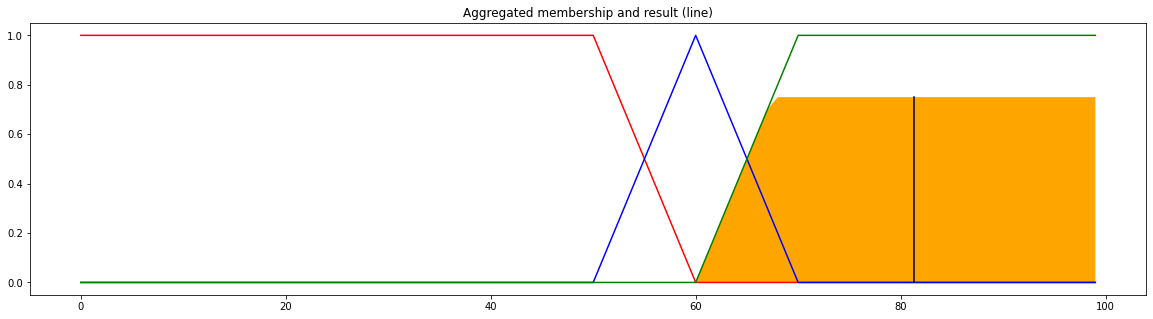

In [ ]:
# visualisasi
hasil_gambar = fzz.interp_membership(x_tingkat,aggregated,hasil)
fig, (ax0) = plt.subplots(nrows=1, figsize=(20,5))
ax0.plot(x_tingkat,tingkat_buruk,'r')
ax0.plot(x_tingkat,tingkat_cukup,'b')
ax0.plot(x_tingkat,tingkat_baik,'g')
ax0.fill_between(x_tingkat,tingkat0,aggregated,facecolor='orange')
ax0.plot([hasil,hasil],[0,hasil_gambar],'k')
ax0.set_title('Aggregated membership and result (line)')